In [1]:
import json
import pandas as pd
import re
import matplotlib.pyplot as plt

# === Step 1: Load and Flatten Parsed Data ===
with open("data/output.json", "r") as f:
    raw_data = json.load(f)

records = []
for file, content in raw_data.items():
    parsed = content.get("parsed", {})
    parsed["source_file"] = file  # keep reference to original image
    records.append(parsed)

# Convert to DataFrame
df = pd.DataFrame(records)
df.columns = [col.lower().replace(" ", "_") for col in df.columns]

In [2]:
# === Step 2: Clean Total Amount ===
def extract_float(text):
    if not isinstance(text, str):
        return None
    matches = re.findall(r"\d+\.\d+|\d+", text)
    return float(matches[-1]) if matches else None

if "total_amount" in df.columns:
    df["total_amount_clean"] = df["total_amount"].apply(extract_float)
else:
    print("❗ Column 'total_amount' not found.")

In [3]:
# === Step 3: Convert Date Column ===
date_col = "invoice_date"
if date_col in df.columns:
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
else:
    print(f"❗ Column '{date_col}' not found.")

/var/folders/wx/81znsths6397s07_ggcjfp_80000gn/T/ipykernel_52369/3257516808.py:4: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_col] = pd.to_datetime(df[date_col], errors="coerce")


In [4]:
# === Step 4: Filter/Search Tools ===
# Example: Find invoices from 2021 over $500
filtered = df[(df["invoice_date"].dt.year == 2021) & (df["total_amount_clean"] > 500)]
print("\nInvoices from 2021 with amount > $500:")
print(filtered[["source_file", "invoice_number", "vendor_name", "invoice_date", "total_amount_clean"]])



Invoices from 2021 with amount > $500:
     source_file invoice_number  \
24       360.png         328679   
284      942.png         904755   
312    60002.png      5215-3946   
343      836.png         201147   
1144     944.png         295419   
1395     832.png         451839   
2356     512.png         432223   
2797   10754.png         723648   
2922     847.png         203321   
3454     461.png         899219   
3556     861.png         382746   
3638     518.png         281672   
3903   60322.png      4480-3000   
3963     490.png         108426   
4482     091.png         366848   
4810     496.png         188912   
4920     086.png         382236   
5017   60284.png      3597-2001   
5389     792.png         332547   
5535     744.png         592957   
5758     815.png         261449   
5957     960.png         737153   
5977     753.png         291554   
6003     196.png         494952   
6193   60144.png      5290-9006   
6237     025.png         492507   
6647   60621.pn

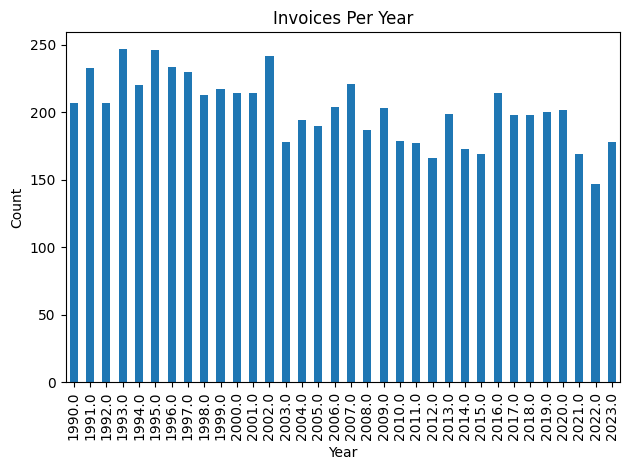

In [5]:
# === Step 5: Plotting ===
# Count invoices by year
if "invoice_date" in df.columns:
    df["year"] = df["invoice_date"].dt.year
    invoice_counts = df["year"].value_counts().sort_index()

    if not invoice_counts.empty:
        invoice_counts.plot(kind="bar", title="Invoices Per Year")
        plt.xlabel("Year")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
    else:
        print("❗ No valid dates available for plotting.")
